**Table of contents**<a id='toc0_'></a>    
- [Original Version:](#toc1_)    
  - [Original 30 column model:](#toc1_1_)    
  - [Original 31 column model:](#toc1_2_)    
  - [Original 1 column model:](#toc1_3_)    
- [New Models:](#toc2_)    
  - [New 5 column model: Distance to the K Means cluster center rather than cluster lable:](#toc2_1_)    
  - [New 35 column model: 30 columns + Distance to the K Means cluster center rather than cluster lable:](#toc2_2_)    
  - [New 5 column model: PCA:](#toc2_3_)    
  - [New 5 column model: ICA:](#toc2_4_)    
  - [New 5 column model: ICA, NORMALIZED:](#toc2_5_)    
- [Predict and Compare:](#toc3_)    
  - [Original 30 column model](#toc3_1_)    
  - [Original 31 column model:](#toc3_2_)    
  - [Original 1 column model:](#toc3_3_)    
  - [New 5 column model: Distance to the K Means cluster center rather than cluster lable:](#toc3_4_)    
  - [New 35 column model: 30 columns + Distance to the K Means cluster center rather than cluster lable:](#toc3_5_)    
  - [New 5 column model: PCA:](#toc3_6_)    
  - [New 5 column model: ICA:](#toc3_7_)    
  - [New 5 column model: ICA, NORMALIZED:](#toc3_8_)    
- [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Original Version:](#toc0_)

In [287]:
from sklearn.datasets import load_breast_cancer  
import pandas as pd

# Load the dataset  
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")

In [288]:
from sklearn.model_selection import train_test_split

# Split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [289]:
from sklearn.preprocessing import StandardScaler

# Scale the features     
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <a id='toc1_1_'></a>[Original 30 column model:](#toc0_)

In [290]:
from sklearn.ensemble import RandomForestClassifier
# Train the model  
model_no_clusters = RandomForestClassifier(random_state=42)
model_no_clusters.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

___

## <a id='toc1_2_'></a>[Original 31 column model:](#toc0_)

In [291]:
from sklearn.cluster import KMeans

# Apply K-Means clustering  
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init=1)
X_train_clusters = kmeans.fit_predict(X_train_scaled)
X_test_clusters = kmeans.predict(X_test_scaled)

X_train_clustered = pd.DataFrame(X_train_scaled, columns=[str(i) for i in range(X_train_scaled.shape[1])])
X_train_clustered['cluster'] = X_train_clusters

X_test_clustered = pd.DataFrame(X_test_scaled, columns=[str(i) for i in range(X_test_scaled.shape[1])])
X_test_clustered['cluster'] = X_test_clusters

In [292]:
# Train the model  
model = RandomForestClassifier(random_state=42)
model.fit(X_train_clustered , y_train)

RandomForestClassifier(random_state=42)

___

## <a id='toc1_3_'></a>[Original 1 column model:](#toc0_)

In [293]:
# Create one_column as a dataframe  
X_train_one_column = pd.DataFrame(X_train_clustered['cluster'], columns=['cluster'])
X_test_one_column = pd.DataFrame(X_test_clustered['cluster'], columns=['cluster'])

In [294]:
# Train the model  
model_one_column = RandomForestClassifier(random_state=42)
model_one_column.fit(X_train_one_column, y_train)

RandomForestClassifier(random_state=42)

___

# <a id='toc2_'></a>[New Models:](#toc0_)

## <a id='toc2_1_'></a>[New 5 column model: Distance to the K Means cluster center rather than cluster lable:](#toc0_)

We extract the center(on training set):

In [295]:
centroids = kmeans.cluster_centers_

We calculate the distance from patient to each center:

In [296]:
import numpy as np
distances_to_centroids_train= np.linalg.norm(X_train_scaled[:, np.newaxis] - centroids, axis=2)
distances_to_centroids_test = np.linalg.norm(X_test_scaled[:, np.newaxis] - centroids, axis=2)

In [297]:
X_train_with_distances = pd.DataFrame(X_train_scaled, columns=[str(i) for i in range(X_train_scaled.shape[1])])

for i in range(distances_to_centroids_train.shape[1]):
    X_train_with_distances[f'distance_to_centroid_{i}'] = distances_to_centroids_train[:, i]

X_test_with_distances = pd.DataFrame(X_test_scaled, columns=[str(i) for i in range(X_test_scaled.shape[1])])

for i in range(distances_to_centroids_test.shape[1]):
    X_test_with_distances[f'distance_to_centroid_{i}'] = distances_to_centroids_test[:, i]

In [298]:
print(X_train_with_distances.head(2))

          0         1         2         3         4         5         6  \
0 -1.072001 -0.658425 -1.088080 -0.939274 -0.135940 -1.008718 -0.968359   
1  1.748743  0.066502  1.751157  1.745559  1.274468  0.842288  1.519852   

          7         8         9  ...        25        26        27        28  \
0 -1.102032  0.281062 -0.113231  ... -1.038836 -1.078995 -1.350527 -0.352658   
1  1.994664 -0.293045 -0.320180  ...  0.249655  1.178594  1.549916  0.191078   

         29  distance_to_centroid_0  distance_to_centroid_1  \
0 -0.541380                2.562011               12.574888   
1 -0.173739                7.662958                5.216265   

   distance_to_centroid_2  distance_to_centroid_3  distance_to_centroid_4  
0                8.950091                7.265881                2.877552  
1                6.732451                3.271990                8.048590  

[2 rows x 35 columns]


In [299]:
print(X_test_with_distances.head(2))

          0         1         2         3         4         5         6  \
0  1.568513  2.164016  1.742866  1.620764 -0.265376  1.915932  1.092455   
1 -0.840276 -0.597067 -0.874174 -0.776170 -1.090346 -1.225691 -0.924639   

          7         8         9  ...        25        26        27        28  \
0  1.698896  0.309589 -0.069884  ...  1.744275  0.688560  1.202144 -0.140431   
1 -0.891008 -1.052578 -0.187341  ... -1.203075 -1.069908 -1.101241 -0.814291   

         29  distance_to_centroid_0  distance_to_centroid_1  \
0  0.900362                9.450162                3.581127   
1 -0.713236                2.418276               12.869926   

   distance_to_centroid_2  distance_to_centroid_3  distance_to_centroid_4  
0                7.888466                4.896337                9.814626  
1                9.637538                7.619421                3.684107  

[2 rows x 35 columns]


Generating model:

In [300]:
# DF with only 5 distance columns 
X_train_distances = pd.DataFrame(distances_to_centroids, columns=[f'distance_to_centroid_{i}' for i in range(distances_to_centroids.shape[1])])
X_test_distances = pd.DataFrame(distances_to_centroids_test, columns=[f'distance_to_centroid_{i}' for i in range(distances_to_centroids_test.shape[1])])
print(X_train_distances.head(2))

   distance_to_centroid_0  distance_to_centroid_1  distance_to_centroid_2  \
0                2.562011               12.574888                8.950091   
1                7.662958                5.216265                6.732451   

   distance_to_centroid_3  distance_to_centroid_4  
0                7.265881                2.877552  
1                3.271990                8.048590  


In [301]:
model_with_distances = RandomForestClassifier(random_state=42)
model_with_distances.fit(X_train_distances, y_train)

RandomForestClassifier(random_state=42)

___

## <a id='toc2_2_'></a>[New 35 column model: 30 columns + Distance to the K Means cluster center rather than cluster lable:](#toc0_)

In [302]:
# 训练模型
model_30_and_distance = RandomForestClassifier(random_state=42)
model_30_and_distance.fit(X_train_with_distances, y_train)

RandomForestClassifier(random_state=42)

___

## <a id='toc2_3_'></a>[New 5 column model: PCA:](#toc0_)

In [303]:
from sklearn.decomposition import PCA

n_components = 5

pca = PCA(n_components=n_components, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PCA_component_{i}' for i in range(n_components)])
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PCA_component_{i}' for i in range(n_components)])

model_5_pca = RandomForestClassifier(random_state=42)
model_5_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

___

## <a id='toc2_4_'></a>[New 5 column model: ICA:](#toc0_)

In [304]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=n_components, random_state=42)

X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

X_train_ica = pd.DataFrame(X_train_ica, columns=[f'ICA_component_{i}' for i in range(n_components)])
X_test_ica = pd.DataFrame(X_test_ica, columns=[f'ICA_component_{i}' for i in range(n_components)])

In [305]:
model_ica = RandomForestClassifier(random_state=42)
model_ica.fit(X_train_ica, y_train)

RandomForestClassifier(random_state=42)

___

## <a id='toc2_5_'></a>[New 5 column model: ICA, NORMALIZED:](#toc0_)

[Normalization function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)  
[Guidence and Description](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization)  

In [306]:
from sklearn.preprocessing import normalize

X_train_normalized = normalize(X_train_scaled, norm='l2')
X_test_normalized = normalize(X_test_scaled, norm='l2')

ica = FastICA(n_components=n_components, random_state=42)

X_train_ica_normalized = ica.fit_transform(X_train_normalized)
X_test_ica_normalized = ica.transform(X_test_normalized)

X_train_ica_normalized = pd.DataFrame(X_train_ica_normalized, columns=[f'ICA_component_{i}' for i in range(n_components)])
X_test_ica_normalized = pd.DataFrame(X_test_ica_normalized, columns=[f'ICA_component_{i}' for i in range(n_components)])

In [307]:
model_ica_normalized = RandomForestClassifier(random_state=42)
model_ica_normalized.fit(X_train_ica_normalized, y_train)

RandomForestClassifier(random_state=42)

___

# <a id='toc3_'></a>[Predict and Compare:](#toc0_)

In [308]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

___

## <a id='toc3_1_'></a>[Original 30 column model](#toc0_)

Training Accuracy - Benchmark Model - 30 features: 1.0
Training Classification Report  - Benchmark Model - 30 features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy  - Benchmark Model - 30 features: 0.956140350877193
Test Classification Report  - Benchmark Model - 30 features:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



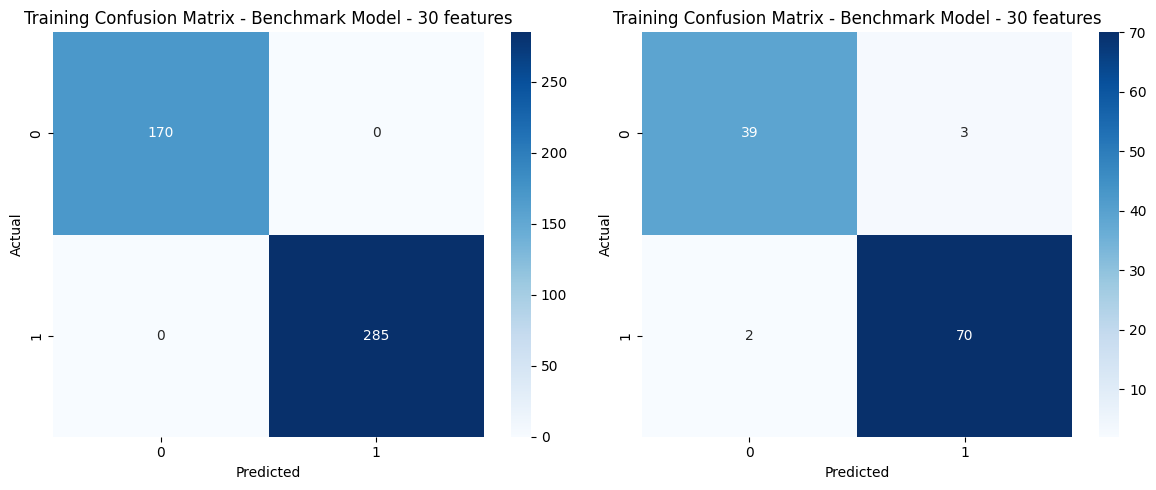

In [309]:

# Predict on the training set   
y_pred_train_no_clusters = model_no_clusters.predict(X_train)

# Predict on the test set    
y_pred_test_no_clusters = model_no_clusters.predict(X_test)

# Evaluate the model on the training set    
accuracy_train_no_clusters = accuracy_score(y_train, y_pred_train_no_clusters)
report_train_no_clusters = classification_report(y_train, y_pred_train_no_clusters)
cm_train_no_clusters = confusion_matrix(y_train, y_pred_train_no_clusters)

# Evaluate the model on the test set    
accuracy_test_no_clusters = accuracy_score(y_test, y_pred_test_no_clusters)
report_test_no_clusters = classification_report(y_test, y_pred_test_no_clusters)
cm_test_no_clusters = confusion_matrix(y_test, y_pred_test_no_clusters)

# Print evaluation metrics    
print(f"Training Accuracy - Benchmark Model - 30 features: {accuracy_train_no_clusters}")  
print(f"Training Classification Report  - Benchmark Model - 30 features:\n{report_train_no_clusters}")  
print(f"Test Accuracy  - Benchmark Model - 30 features: {accuracy_test_no_clusters}")  
print(f"Test Classification Report  - Benchmark Model - 30 features:\n{report_test_no_clusters}")  


# Plot confusion matrices   
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train_no_clusters, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - Benchmark Model - 30 features')  
axes[0].set_xlabel('Predicted')  
axes[0].set_ylabel('Actual')  

sns.heatmap(cm_test_no_clusters, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Training Confusion Matrix - Benchmark Model - 30 features')  
axes[1].set_xlabel('Predicted')  
axes[1].set_ylabel('Actual')  


plt.tight_layout()
plt.show()


___

## <a id='toc3_2_'></a>[Original 31 column model:](#toc0_)

Training Accuracy - Model with extra column (clusters) - 31 features: 1.0
Training Classification Report - Model with extra column (clusters) - 31 features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy - Model with extra column (clusters) - 31 features: 0.9473684210526315
Test Classification Report - Model with extra column (clusters) - 31 features:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



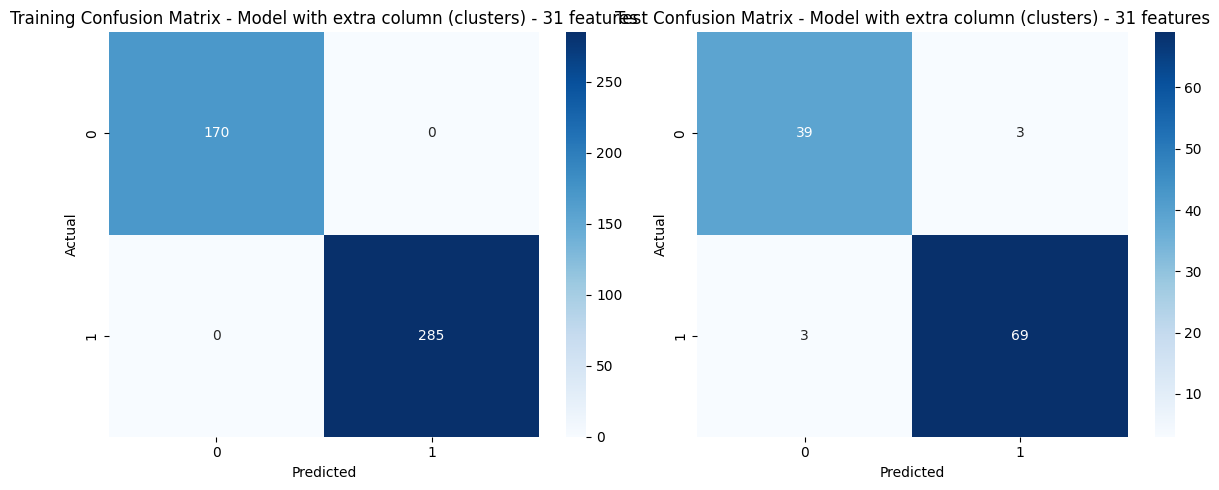

In [310]:
# Predict on the training set  
y_pred_train = model.predict(X_train_clustered)

# Predict on the test set  
y_pred_test = model.predict(X_test_clustered)

# Evaluate the model on the training set   
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

# Evaluate the model on the test set    
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics  
print(f"Training Accuracy - Model with extra column (clusters) - 31 features: {accuracy_train}")
print(f"Training Classification Report - Model with extra column (clusters) - 31 features:\n{report_train}")
print(f"Test Accuracy - Model with extra column (clusters) - 31 features: {accuracy_test}")
print(f"Test Classification Report - Model with extra column (clusters) - 31 features:\n{report_test}")


# Plot confusion matrices    
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - Model with extra column (clusters) - 31 features')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix - Model with extra column (clusters) - 31 features')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')


plt.tight_layout()
plt.show()

___

## <a id='toc3_3_'></a>[Original 1 column model:](#toc0_)

Training Accuracy - Benchmark Model - 1 feature: 0.9296703296703297
Training Classification Report  - Benchmark Model - 1 feature:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       170
           1       0.94      0.94      0.94       285

    accuracy                           0.93       455
   macro avg       0.92      0.92      0.92       455
weighted avg       0.93      0.93      0.93       455

Test Accuracy  - Benchmark Model - 1 feature: 0.9122807017543859
Test Classification Report  - Benchmark Model - 1 feature:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



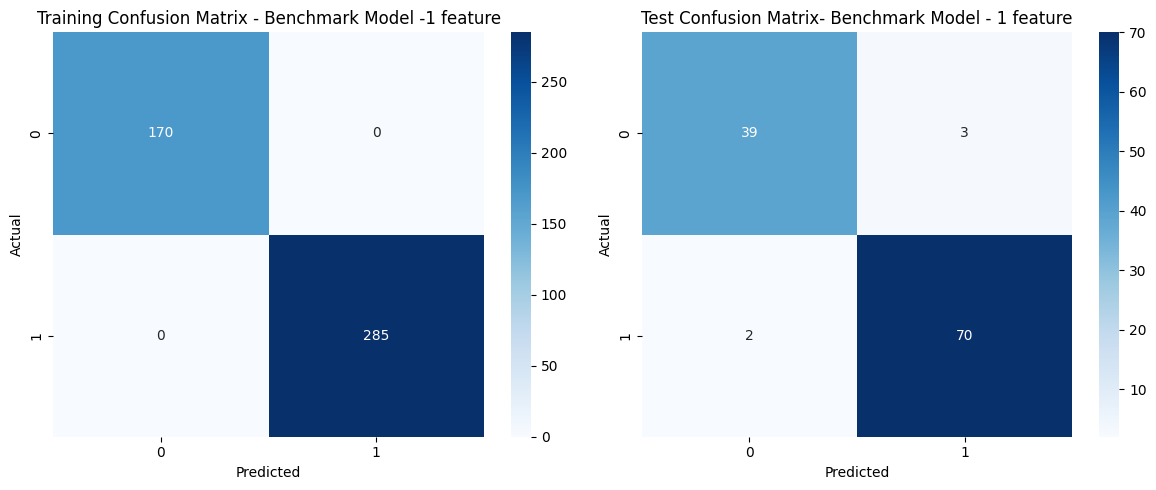

In [311]:
# Predict on the training set  
y_pred_train_one_column = model_one_column.predict(X_train_one_column)

# Predict on the test set  
y_pred_test_one_column = model_one_column.predict(X_test_one_column)

# Evaluate the model on the training set  
accuracy_train_one_column = accuracy_score(y_train, y_pred_train_one_column)
report_train_one_column = classification_report(y_train, y_pred_train_one_column)
cm_train_one_column = confusion_matrix(y_train, y_pred_train_one_column)

# Evaluate the model on the test set  
accuracy_test_one_column = accuracy_score(y_test, y_pred_test_one_column)
report_test_one_column = classification_report(y_test, y_pred_test_one_column)
cm_test_one_column = confusion_matrix(y_test, y_pred_test_one_column)

# Print evaluation metrics  
print(f"Training Accuracy - Benchmark Model - 1 feature: {accuracy_train_one_column}")
print(f"Training Classification Report  - Benchmark Model - 1 feature:\n{report_train_one_column}")

print(f"Test Accuracy  - Benchmark Model - 1 feature: {accuracy_test_one_column}")
print(f"Test Classification Report  - Benchmark Model - 1 feature:\n{report_test_one_column}")


# Plot confusion matrices  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train_no_clusters, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - Benchmark Model -1 feature')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_no_clusters, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix- Benchmark Model - 1 feature')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


___

## <a id='toc3_4_'></a>[New 5 column model: Distance to the K Means cluster center rather than cluster lable:](#toc0_)

Training Accuracy - 5 Distance: 1.0
Training Classification Report - 5 Distance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy - 5 Distance: 0.9210526315789473
Test Classification Report - 5 Distance:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



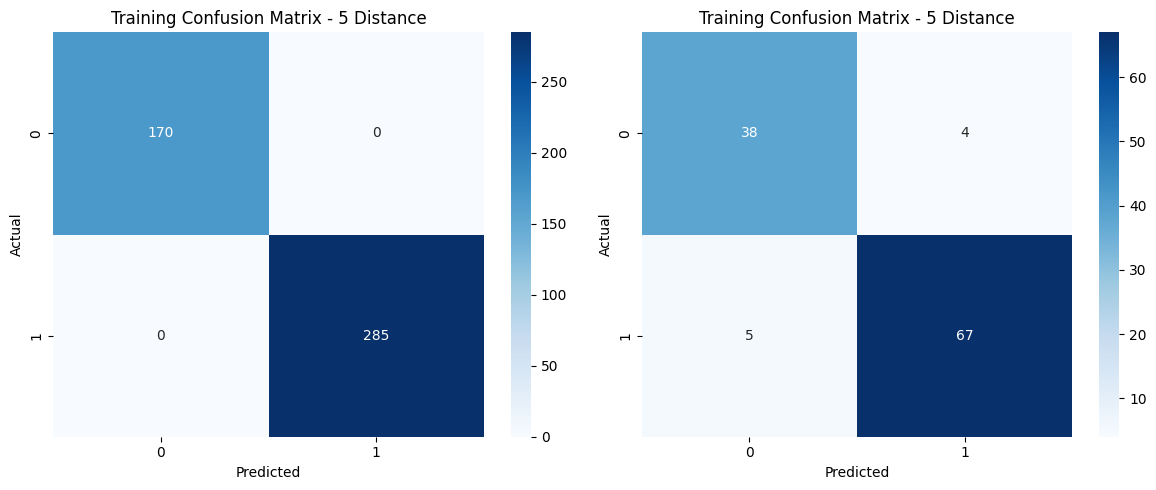

In [312]:
# Predict on the training set  
y_pred_train_distances = model_with_distances.predict(X_train_distances)
y_pred_test_distances = model_with_distances.predict(X_test_distances)

# Evaluate model
accuracy_train_distances = accuracy_score(y_train, y_pred_train_distances)
report_train_distances = classification_report(y_train, y_pred_train_distances)
cm_train_distances = confusion_matrix(y_train, y_pred_train_distances)

accuracy_test_distances = accuracy_score(y_test, y_pred_test_distances)
report_test_distances = classification_report(y_test, y_pred_test_distances)
cm_test_distances = confusion_matrix(y_test, y_pred_test_distances)

# Print evaluation metrics  
print(f"Training Accuracy - 5 Distance: {accuracy_train_distances}")  
print(f"Training Classification Report - 5 Distance:\n{report_train_distances}")
print(f"Test Accuracy - 5 Distance: {accuracy_test_distances}")
print(f"Test Classification Report - 5 Distance:\n{report_test_distances}")

# Plot confusion matrices  
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train_distances, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - 5 Distance')  
axes[0].set_xlabel('Predicted')  
axes[0].set_ylabel('Actual')  

sns.heatmap(cm_test_distances, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Training Confusion Matrix - 5 Distance')  
axes[1].set_xlabel('Predicted')  
axes[1].set_ylabel('Actual')  

plt.tight_layout()
plt.show()

___

## <a id='toc3_5_'></a>[New 35 column model: 30 columns + Distance to the K Means cluster center rather than cluster lable:](#toc0_)

Training Accuracy - 30 Column + 5 Distance model: 1.0
Training Classification Report - 30 Column + 5 Distance model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy - 30 Column + 5 Distance model: 0.9385964912280702
Test Classification Report - 30 Column + 5 Distance model:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



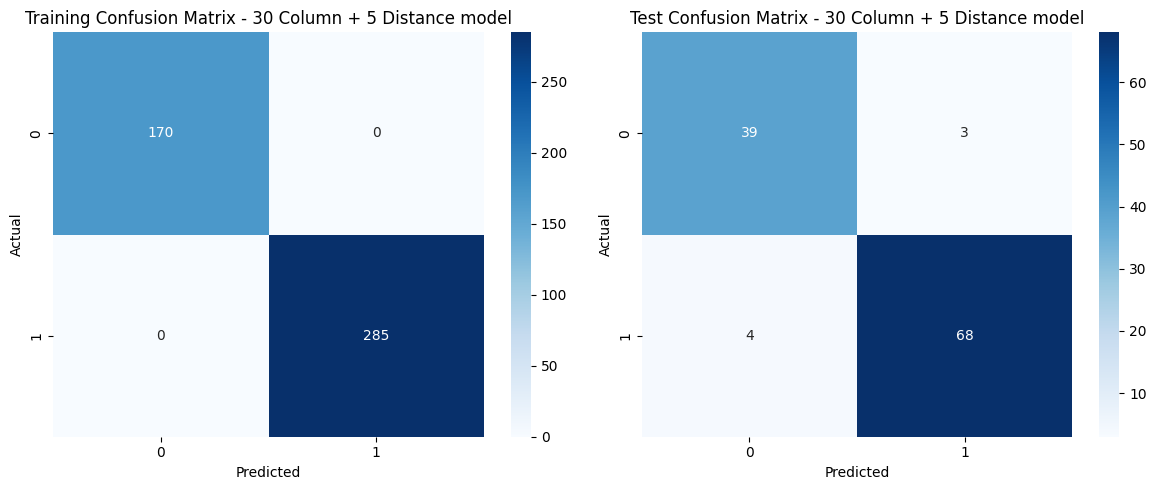

In [313]:
# Predict
y_pred_train_with_distances = model_30_and_distance.predict(X_train_with_distances)
y_pred_test_with_distances = model_30_and_distance.predict(X_test_with_distances)

# Evaluate model
accuracy_train_with_distances = accuracy_score(y_train, y_pred_train_with_distances)
report_train_with_distances = classification_report(y_train, y_pred_train_with_distances)
cm_train_with_distances = confusion_matrix(y_train, y_pred_train_with_distances)

accuracy_test_with_distances = accuracy_score(y_test, y_pred_test_with_distances)
report_test_with_distances = classification_report(y_test, y_pred_test_with_distances)
cm_test_with_distances = confusion_matrix(y_test, y_pred_test_with_distances)

# Print evaluation metrics  
print(f"Training Accuracy - 30 Column + 5 Distance model: {accuracy_train_with_distances}")
print(f"Training Classification Report - 30 Column + 5 Distance model:\n{report_train_with_distances}")
print(f"Test Accuracy - 30 Column + 5 Distance model: {accuracy_test_with_distances}")
print(f"Test Classification Report - 30 Column + 5 Distance model:\n{report_test_with_distances}")

# Plot confusion matrices  
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train_with_distances, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - 30 Column + 5 Distance model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_with_distances, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix - 30 Column + 5 Distance model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

___

## <a id='toc3_6_'></a>[New 5 column model: PCA:](#toc0_)

Training Accuracy - 5 column PCA: 1.0
Training Classification Report - 5 column PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy - 5 column PCA: 0.9122807017543859
Test Classification Report - 5 column PCA:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



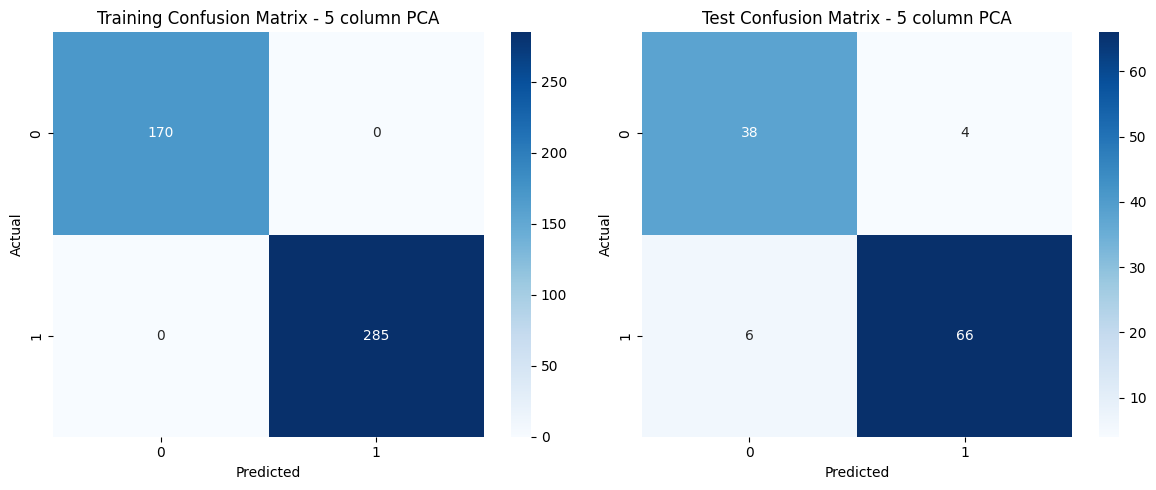

In [314]:
# Predict
y_pred_train_pca = model_5_pca.predict(X_train_pca)
y_pred_test_pca = model_5_pca.predict(X_test_pca)

# Evaluate model
accuracy_train_pca = accuracy_score(y_train, y_pred_train_pca)
report_train_pca = classification_report(y_train, y_pred_train_pca)
cm_train_pca = confusion_matrix(y_train, y_pred_train_pca)

accuracy_test_pca = accuracy_score(y_test, y_pred_test_pca)
report_test_pca = classification_report(y_test, y_pred_test_pca)
cm_test_pca = confusion_matrix(y_test, y_pred_test_pca)

# Print evaluation metrics  
print(f"Training Accuracy - 5 column PCA: {accuracy_train_pca}")
print(f"Training Classification Report - 5 column PCA:\n{report_train_pca}")
print(f"Test Accuracy - 5 column PCA: {accuracy_test_pca}")
print(f"Test Classification Report - 5 column PCA:\n{report_test_pca}")

# Plot confusion matrices  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train_pca, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - 5 column PCA')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_pca, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix - 5 column PCA')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

___

## <a id='toc3_7_'></a>[New 5 column model: ICA:](#toc0_)

Training Accuracy - 5 column ICA: 1.0
Training Classification Report - 5 column ICA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy - 5 column ICA: 0.9385964912280702
Test Classification Report - 5 column ICA:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      0.93      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



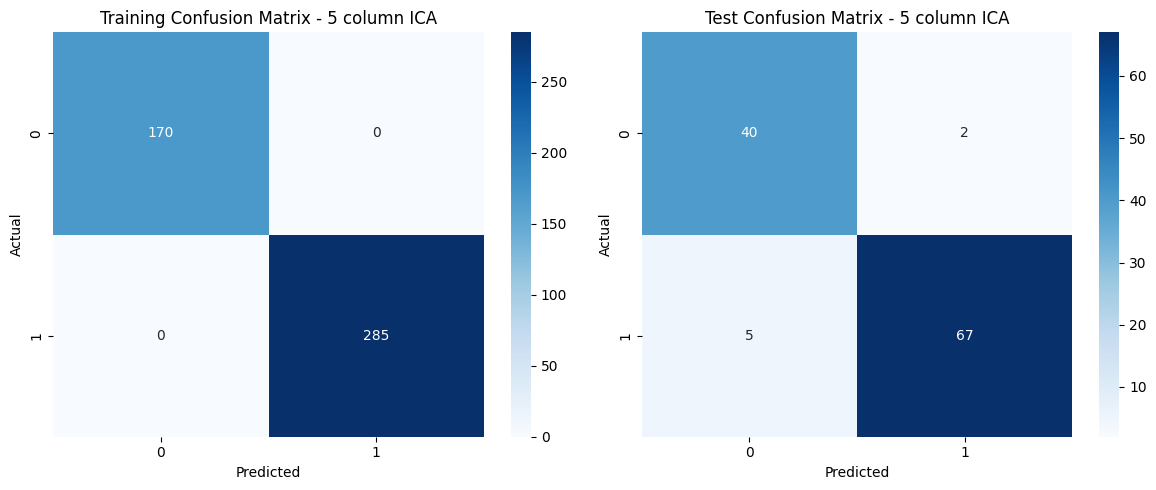

In [315]:
# Predict
y_pred_train_ica = model_ica.predict(X_train_ica)
y_pred_test_ica = model_ica.predict(X_test_ica)
# Evaluate model
accuracy_train_ica = accuracy_score(y_train, y_pred_train_ica)
report_train_ica = classification_report(y_train, y_pred_train_ica)
cm_train_ica = confusion_matrix(y_train, y_pred_train_ica)

accuracy_test_ica = accuracy_score(y_test, y_pred_test_ica)
report_test_ica = classification_report(y_test, y_pred_test_ica)
cm_test_ica = confusion_matrix(y_test, y_pred_test_ica)

# Print evaluation metrics  
print(f"Training Accuracy - 5 column ICA: {accuracy_train_ica}")
print(f"Training Classification Report - 5 column ICA:\n{report_train_ica}")
print(f"Test Accuracy - 5 column ICA: {accuracy_test_ica}")
print(f"Test Classification Report - 5 column ICA:\n{report_test_ica}")

# Plot confusion matrices  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train_ica, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - 5 column ICA')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_ica, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix - 5 column ICA')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

___

## <a id='toc3_8_'></a>[New 5 column model: ICA, NORMALIZED:](#toc0_)

Training Accuracy - ICA 5 component(L2 Normalized)model: 1.0
Training Classification Report - ICA 5 component(L2 Normalized)model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Accuracy - ICA 5 component(L2 Normalized)model: 0.9736842105263158
Test Classification Report - ICA 5 component(L2 Normalized)model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



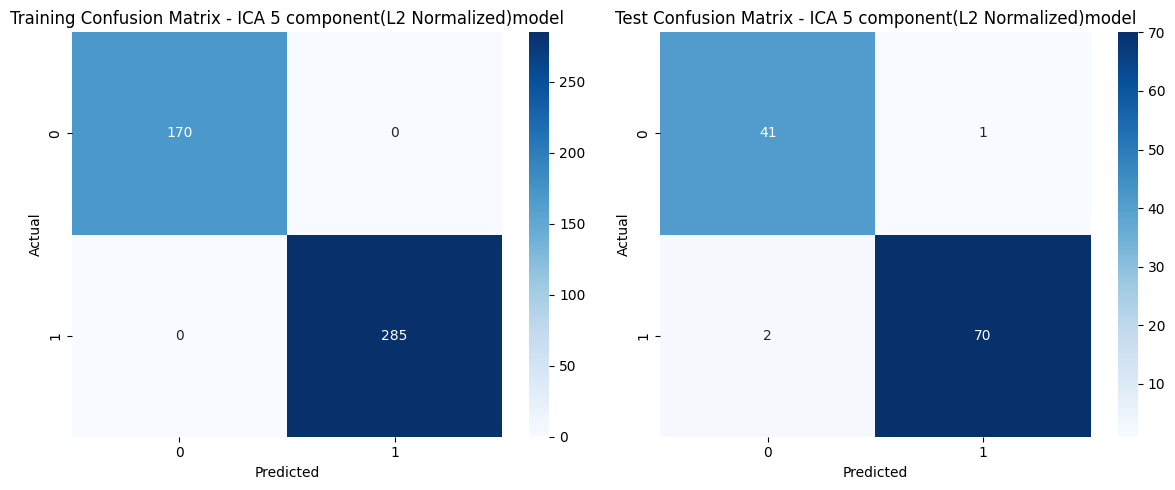

In [316]:

# Predict
y_pred_train_ica_normalized = model_ica_normalized.predict(X_train_ica_normalized)
y_pred_test_ica_normalized = model_ica_normalized.predict(X_test_ica_normalized)

# Evaluate model
accuracy_train_ica_normalized = accuracy_score(y_train, y_pred_train_ica_normalized)
report_train_ica_normalized = classification_report(y_train, y_pred_train_ica_normalized)
cm_train_ica_normalized = confusion_matrix(y_train, y_pred_train_ica_normalized)

accuracy_test_ica_normalized = accuracy_score(y_test, y_pred_test_ica_normalized)
report_test_ica_normalized = classification_report(y_test, y_pred_test_ica_normalized)
cm_test_ica_normalized = confusion_matrix(y_test, y_pred_test_ica_normalized)

# Print evaluation metrics  
print(f"Training Accuracy - ICA 5 component(L2 Normalized)model: {accuracy_train_ica_normalized}")
print(f"Training Classification Report - ICA 5 component(L2 Normalized)model:\n{report_train_ica_normalized}")
print(f"Test Accuracy - ICA 5 component(L2 Normalized)model: {accuracy_test_ica_normalized}")
print(f"Test Classification Report - ICA 5 component(L2 Normalized)model:\n{report_test_ica_normalized}")

# Plot confusion matrices  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train_ica_normalized, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Confusion Matrix - ICA 5 component(L2 Normalized)model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_test_ica_normalized, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix - ICA 5 component(L2 Normalized)model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# <a id='toc4_'></a>[Summary](#toc0_)

In [317]:
# accuracy of each model
models_accuracy = {
    "Original 30 column model": (accuracy_train_no_clusters, accuracy_test_no_clusters),
    "Original 31 column model": (accuracy_train, accuracy_test),
    "Original 1 column model": (accuracy_train_one_column, accuracy_test_one_column),
    "5 Distance Model": (accuracy_train_distances, accuracy_test_distances),
    "30 Column + 5 Distance Model": (accuracy_train_with_distances, accuracy_test_with_distances),
    "5 column PCA": (accuracy_train_pca, accuracy_test_pca),
    "5 column ICA": (accuracy_train_ica, accuracy_test_ica),
    "ICA 5 component (L2 Normalized) Model": (accuracy_train_ica_normalized, accuracy_test_ica_normalized)
}

YELLOW = "\033[93m"
END = "\033[0m"

# print table
for model, (train_acc, test_acc) in models_accuracy.items():
    if test_acc > 0.956:
        print(f"{model:<40} {train_acc:<20} {YELLOW}{test_acc:<20}{END}")
    else:
        print(f"{model:<40} {train_acc:<20} {test_acc:<20}")


Original 30 column model                 1.0                  0.956140350877193   
Original 31 column model                 1.0                  0.9473684210526315  
Original 1 column model                  0.9296703296703297   0.9122807017543859  
5 Distance Model                         1.0                  0.9210526315789473  
30 Column + 5 Distance Model             1.0                  0.9385964912280702  
5 column PCA                             1.0                  0.9122807017543859  
5 column ICA                             1.0                  0.9385964912280702  
ICA 5 component (L2 Normalized) Model    1.0                  0.9736842105263158  
